# weather prediction

In [92]:
# this will predict it will rain or not using some weather conditions
# for prediction we use this columns
# *precipitation
# *temp_max
# *temp_min
# *wind

# and predict that

# * drizzle

# * rain
# * sun
# * snow
# * fog


## loading the data

In [93]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\91980\Downloads\reshavweatherdataset.csv")


In [94]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [95]:
df['temp_max']

0       12.8
1       10.6
2       11.7
3       12.2
4        8.9
        ... 
1456     4.4
1457     5.0
1458     7.2
1459     5.6
1460     5.6
Name: temp_max, Length: 1461, dtype: float64

In [96]:
df.shape

(1461, 6)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [98]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [99]:
df['precipitation']

0        0.0
1       10.9
2        0.8
3       20.3
4        1.3
        ... 
1456     8.6
1457     1.5
1458     0.0
1459     0.0
1460     0.0
Name: precipitation, Length: 1461, dtype: float64

In [100]:
df['temp_max']

0       12.8
1       10.6
2       11.7
3       12.2
4        8.9
        ... 
1456     4.4
1457     5.0
1458     7.2
1459     5.6
1460     5.6
Name: temp_max, Length: 1461, dtype: float64

In [101]:
df[['temp_min','wind','weather','date']]

,temp_min,wind,weather,date
0,5.0,4.7,drizzle,2012-01-01
1,2.8,4.5,rain,2012-01-02
2,7.2,2.3,rain,2012-01-03
3,5.6,4.7,rain,2012-01-04
4,2.8,6.1,rain,2012-01-05
...,...,...,...,...
1456,1.7,2.9,rain,2015-12-27
1457,1.7,1.3,rain,2015-12-28
1458,0.6,2.6,fog,2015-12-29
1459,-1.0,3.4,sun,2015-12-30


In [102]:
df.head(20)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [103]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [104]:
df.nunique()#  thiss will give the no. of unique values in each column

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [105]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [106]:
df['wind'].unique()

array([4.7, 4.5, 2.3, 6.1, 2.2, 2. , 3.4, 5.1, 1.9, 1.3, 5.3, 3.2, 5. ,
       5.6, 1.6, 8.2, 4.8, 3.6, 5.4, 1.4, 3.9, 2.7, 2.6, 4.3, 2.9, 2.4,
       3. , 3.1, 1.8, 2.1, 8.1, 7.5, 5.9, 3.5, 6.4, 4.2, 7. , 6.2, 2.5,
       2.8, 5.8, 3.8, 5.2, 4.4, 6.8, 4.1, 4. , 8. , 4.6, 1.5, 6.3, 3.3,
       3.7, 1.7, 6. , 1.1, 7.3, 6.5, 5.7, 5.5, 4.9, 1. , 1.2, 9.5, 0.6,
       7.1, 7.6, 0.9, 0.4, 7.9, 7.2, 0.5, 0.7, 8.8, 0.8, 6.6, 6.9, 6.7,
       7.7])

In [107]:
df['weather'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Name: weather, Length: 1461, dtype: bool

In [108]:
df.isna()

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


In [109]:
df.index # this will give he range of index values

RangeIndex(start=0, stop=1461, step=1)

In [110]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [111]:
df.count()

date             1461
precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

In [112]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [113]:
df['wind'].value_counts()

2.6    76
3.0    65
2.2    55
2.5    51
2.8    47
       ..
8.2     1
0.4     1
0.7     1
6.9     1
7.7     1
Name: wind, Length: 79, dtype: int64

In [114]:
df.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [115]:
df[2:5]

,date,precipitation,temp_max,temp_min,wind,weather
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [116]:
df.loc[2:5]

,date,precipitation,temp_max,temp_min,wind,weather
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain


In [117]:
df.loc[:10,"date":"wind"]

,date,precipitation,temp_max,temp_min,wind
0,2012-01-01,0.0,12.8,5.0,4.7
1,2012-01-02,10.9,10.6,2.8,4.5
2,2012-01-03,0.8,11.7,7.2,2.3
3,2012-01-04,20.3,12.2,5.6,4.7
4,2012-01-05,1.3,8.9,2.8,6.1
5,2012-01-06,2.5,4.4,2.2,2.2
6,2012-01-07,0.0,7.2,2.8,2.3
7,2012-01-08,0.0,10.0,2.8,2.0
8,2012-01-09,4.3,9.4,5.0,3.4
9,2012-01-10,1.0,6.1,0.6,3.4


In [118]:
df.iloc[:10,:5]

,date,precipitation,temp_max,temp_min,wind
0,2012-01-01,0.0,12.8,5.0,4.7
1,2012-01-02,10.9,10.6,2.8,4.5
2,2012-01-03,0.8,11.7,7.2,2.3
3,2012-01-04,20.3,12.2,5.6,4.7
4,2012-01-05,1.3,8.9,2.8,6.1
5,2012-01-06,2.5,4.4,2.2,2.2
6,2012-01-07,0.0,7.2,2.8,2.3
7,2012-01-08,0.0,10.0,2.8,2.0
8,2012-01-09,4.3,9.4,5.0,3.4
9,2012-01-10,1.0,6.1,0.6,3.4


In [119]:
df.loc[:10,"wind":]

,wind,weather
0,4.7,drizzle
1,4.5,rain
2,2.3,rain
3,4.7,rain
4,6.1,rain
5,2.2,rain
6,2.3,rain
7,2.0,sun
8,3.4,rain
9,3.4,rain


In [120]:
df.wind.unique()

array([4.7, 4.5, 2.3, 6.1, 2.2, 2. , 3.4, 5.1, 1.9, 1.3, 5.3, 3.2, 5. ,
       5.6, 1.6, 8.2, 4.8, 3.6, 5.4, 1.4, 3.9, 2.7, 2.6, 4.3, 2.9, 2.4,
       3. , 3.1, 1.8, 2.1, 8.1, 7.5, 5.9, 3.5, 6.4, 4.2, 7. , 6.2, 2.5,
       2.8, 5.8, 3.8, 5.2, 4.4, 6.8, 4.1, 4. , 8. , 4.6, 1.5, 6.3, 3.3,
       3.7, 1.7, 6. , 1.1, 7.3, 6.5, 5.7, 5.5, 4.9, 1. , 1.2, 9.5, 0.6,
       7.1, 7.6, 0.9, 0.4, 7.9, 7.2, 0.5, 0.7, 8.8, 0.8, 6.6, 6.9, 6.7,
       7.7])

In [121]:
df.wind.mean()

3.24113620807666

In [122]:
df.temp_max.mean()

16.43908281998631

In [123]:
n=df.temp_max.mean()
df.loc[df["temp_max"]>n]

,date,precipitation,temp_max,temp_min,wind,weather
92,2012-04-02,0.0,16.7,4.4,3.1,sun
98,2012-04-08,0.0,21.1,7.2,4.1,sun
99,2012-04-09,0.0,20.0,6.1,2.1,sun
100,2012-04-10,0.0,17.8,8.9,3.2,rain
111,2012-04-21,0.0,20.0,4.4,2.3,sun
...,...,...,...,...,...,...
1385,2015-10-17,0.3,19.4,11.7,1.3,rain
1387,2015-10-19,0.3,17.2,12.2,2.6,rain
1388,2015-10-20,0.0,17.8,10.6,1.8,fog
1393,2015-10-25,8.9,19.4,8.9,3.4,rain


In [124]:
x=df.loc[:,'date':'wind']

In [125]:
x

,date,precipitation,temp_max,temp_min,wind
0,2012-01-01,0.0,12.8,5.0,4.7
1,2012-01-02,10.9,10.6,2.8,4.5
2,2012-01-03,0.8,11.7,7.2,2.3
3,2012-01-04,20.3,12.2,5.6,4.7
4,2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9
1457,2015-12-28,1.5,5.0,1.7,1.3
1458,2015-12-29,0.0,7.2,0.6,2.6
1459,2015-12-30,0.0,5.6,-1.0,3.4


In [126]:
df.dropna()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [127]:
df.drop(1)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [128]:
df.drop([1,2,3])# this is used to drop the rows

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [129]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


## data visualization

Text(0, 0.5, 'temp_min')

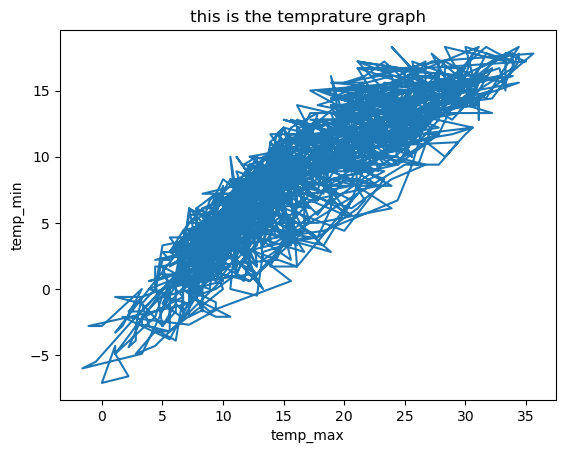

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
a=df['temp_max']
b=df['temp_min']
plt.plot(a,b)
plt.title("this is the temprature graph")
plt.xlabel("temp_max")
plt.ylabel("temp_min")

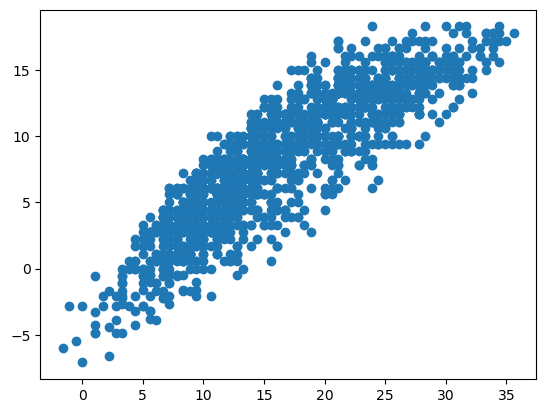

In [131]:
plt.scatter(a,b)

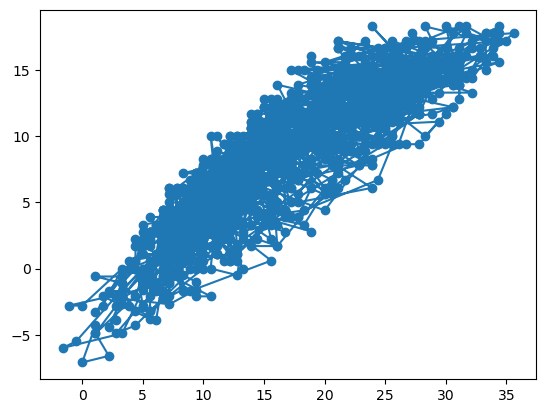

In [132]:
plt.scatter(a,b)
plt.plot(a,b)

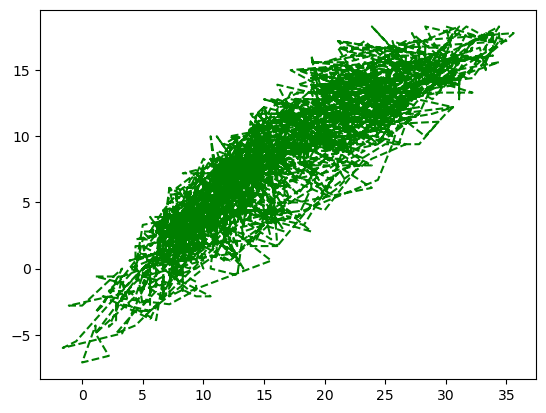

In [133]:
plt.plot(a,b,'g--')


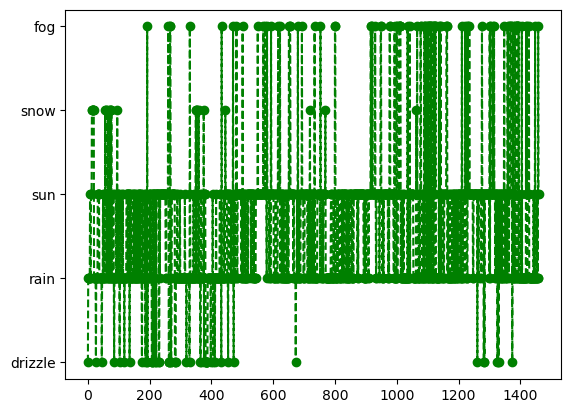

In [134]:
plt.plot(df["weather"],'go--')

In [135]:
df.weather.replace(['drizzle','rain','sun','snow','fog'],[1,2,3,4,5],inplace=True)
df['weather'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [137]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,1
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,5
1459,2015-12-30,0.0,5.6,-1.0,3.4,3


## ploting with seaborn

In [141]:
df2=df.drop(["date","precipitation"],axis=1)
df2

,temp_max,temp_min,wind,weather
0,12.8,5.0,4.7,1
1,10.6,2.8,4.5,2
2,11.7,7.2,2.3,2
3,12.2,5.6,4.7,2
4,8.9,2.8,6.1,2
...,...,...,...,...
1456,4.4,1.7,2.9,2
1457,5.0,1.7,1.3,2
1458,7.2,0.6,2.6,5
1459,5.6,-1.0,3.4,3


In [142]:
df2.to_csv("mycdataset.csv")


<Axes: >

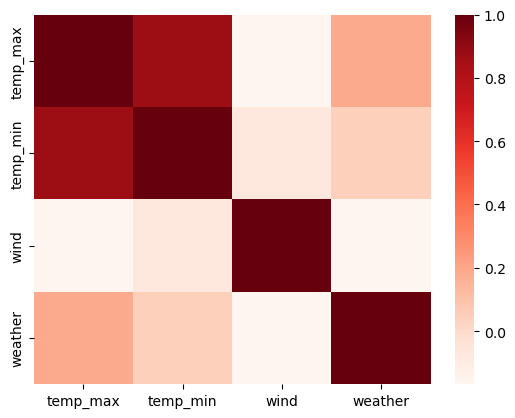

In [143]:
import seaborn as sns
corr=df2.corr()
sns.heatmap(corr,cmap='Reds')

In [144]:
import seaborn as sns
x=df2.iloc[:,0:3]
x

,temp_max,temp_min,wind
0,12.8,5.0,4.7
1,10.6,2.8,4.5
2,11.7,7.2,2.3
3,12.2,5.6,4.7
4,8.9,2.8,6.1
...,...,...,...
1456,4.4,1.7,2.9
1457,5.0,1.7,1.3
1458,7.2,0.6,2.6
1459,5.6,-1.0,3.4


In [145]:
y=df2.iloc[:,-1]
y

0       1
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    5
1459    3
1460    3
Name: weather, Length: 1461, dtype: int64

In [146]:
df2
#df.drop(["date","precipitation"],axis=1)

,temp_max,temp_min,wind,weather
0,12.8,5.0,4.7,1
1,10.6,2.8,4.5,2
2,11.7,7.2,2.3,2
3,12.2,5.6,4.7,2
4,8.9,2.8,6.1,2
...,...,...,...,...
1456,4.4,1.7,2.9,2
1457,5.0,1.7,1.3,2
1458,7.2,0.6,2.6,5
1459,5.6,-1.0,3.4,3


## split

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,shuffle=True,random_state=42)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train: (1168, 3)
y_train: (1168,)
x_test (293, 3)
y_test (293,)


## model selection

In [148]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [177]:
model=LogisticRegression()
model.fit(x,y)

C:\Users\91980\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [186]:
prediction=model.predict([[10,0.6,2.6]])
prediction

C:\Users\91980\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

In [179]:
prediction1=model.predict(x_test)
prediction1

array([3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3,
       2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3,
       2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2,
       3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 4, 3, 3, 3, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2,
       2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2,
       3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2,
       3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3,
       2, 3, 3, 3, 3, 2, 3], dtype=int64)

In [180]:
y_test

892     3
1105    2
413     2
522     3
1036    2
       ..
1361    3
802     2
651     5
722     2
254     3
Name: weather, Length: 293, dtype: int64

In [181]:
accuracy=(accuracy_score(y_test,prediction1))*100
accuracy

68.60068259385666

[[  0   3   6   0   0]
 [  0 100  20   0   0]
 [  0  31 100   0   0]
 [  0   7   1   0   0]
 [  0   8  17   0   0]]


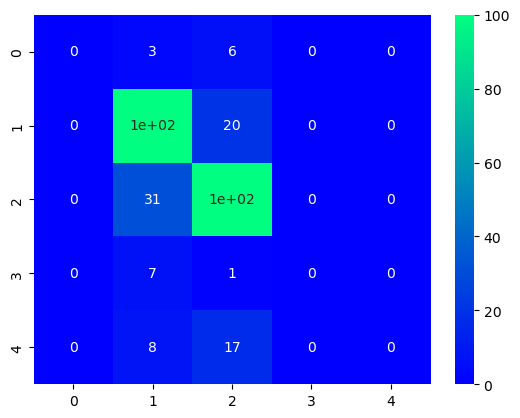

In [154]:
confusion=confusion_matrix(y_test,prediction1)
print(confusion)
sns.heatmap(confusion,cmap='winter',annot=True)
plt.show()

## decision Tree

In [155]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [156]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [157]:
prediction1=model.predict(x_test)
prediction1

array([3, 2, 2, 1, 2, 2, 2, 3, 2, 1, 3, 3, 2, 1, 2, 2, 3, 2, 3, 3, 2, 3,
       3, 3, 3, 2, 2, 3, 3, 5, 3, 3, 5, 3, 3, 2, 2, 2, 2, 1, 2, 3, 3, 3,
       2, 5, 3, 2, 3, 5, 3, 2, 3, 2, 3, 2, 2, 3, 2, 5, 2, 3, 3, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 5, 2, 2, 3, 2, 2, 3, 5, 3, 2, 3, 2, 1, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 3, 2, 3, 2, 2, 4, 2, 2, 3, 2, 3, 3,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 5, 3,
       3, 2, 1, 3, 2, 2, 2, 3, 2, 3, 3, 5, 3, 2, 3, 2, 3, 5, 2, 2, 3, 5,
       3, 2, 5, 3, 3, 2, 5, 2, 2, 3, 3, 2, 2, 3, 3, 5, 2, 2, 2, 3, 2, 2,
       1, 3, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 3, 5, 2, 3, 3, 2, 3, 2, 2, 2,
       3, 2, 3, 2, 1, 2, 3, 5, 2, 3, 4, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 5, 3, 2, 3, 3, 2, 2, 3, 2, 3, 5, 2, 2,
       3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2,
       2, 2, 3, 5, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 5, 1, 3, 2, 2, 2, 3, 3,
       5, 3, 3, 3, 3, 2, 2], dtype=int64)

In [67]:
y_test

892     3
1105    2
413     2
522     3
1036    2
       ..
1361    3
802     2
651     5
722     2
254     3
Name: weather, Length: 293, dtype: int64

In [158]:
accuracy2=(accuracy_score(y_test,prediction1))*100
print(accuracy2,'%')

59.044368600682596 %


[[ 1  2  6  0  0]
 [ 0 89 22  1  8]
 [ 9 32 79  0 11]
 [ 0  2  5  1  0]
 [ 2  7 13  0  3]]


<Axes: >

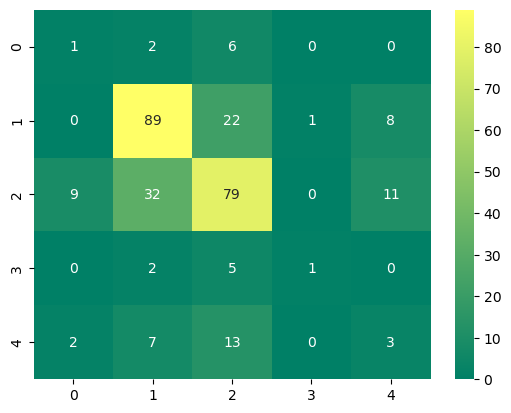

In [159]:
confusion2=confusion_matrix(y_test,prediction1)
print(confusion2)
sns.heatmap(confusion2,annot=True,cmap='summer')

## knn

In [160]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [161]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [162]:
prediction2=model.predict(x_test)
prediction2

array([3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3,
       3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 4, 3, 1,
       2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 4, 2, 3, 2, 3, 5, 3, 3, 2,
       2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3,
       2, 2, 2, 2, 3, 1, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3,
       3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2,
       5, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2,
       3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2,
       3, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 5, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2,
       3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 1, 3, 2, 3, 2, 3, 3,
       2, 3, 3, 2, 2, 2, 3], dtype=int64)

In [163]:
y_test

892     3
1105    2
413     2
522     3
1036    2
       ..
1361    3
802     2
651     5
722     2
254     3
Name: weather, Length: 293, dtype: int64

In [164]:
accuracy3=(accuracy_score(y_test,prediction2))*100
print(accuracy3,'%')

69.6245733788396 %


[[  2   4   3   0   0]
 [  0  99  19   0   2]
 [  1  28 101   1   0]
 [  0   3   4   1   0]
 [  1  12  11   0   1]]


<Axes: >

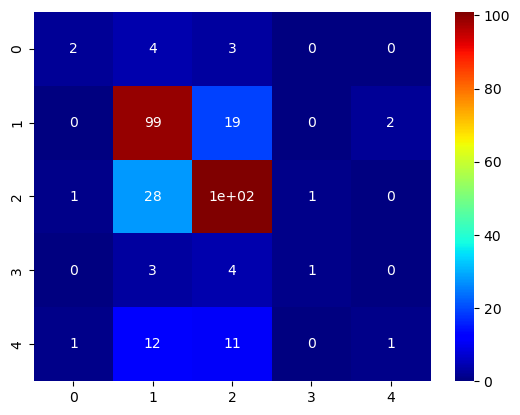

In [165]:
confusion3=confusion_matrix(y_test,prediction2)
print(confusion3)
sns.heatmap(confusion3,annot=True,cmap='jet')

# SVM

In [166]:
from sklearn import svm
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [167]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [168]:
prediction4=model.predict(x_test)
prediction4

array([3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3,
       2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2,
       3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3,
       2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2,
       3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2,
       3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3,
       2, 3, 3, 2, 2, 2, 3], dtype=int64)

In [169]:
y_test

892     3
1105    2
413     2
522     3
1036    2
       ..
1361    3
802     2
651     5
722     2
254     3
Name: weather, Length: 293, dtype: int64

In [176]:
accuracy4=(accuracy_score(y_test,prediction4))*100
print(accuracy4,'%')

70.98976109215018 %


In [188]:
prediction4=model.predict([[7.0,0.6,2.6]])
prediction4

C:\Users\91980\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

[[  0   3   6   0   0]
 [  0 102  18   0   0]
 [  0  25 106   0   0]
 [  0   3   5   0   0]
 [  0   9  16   0   0]]


<Axes: >

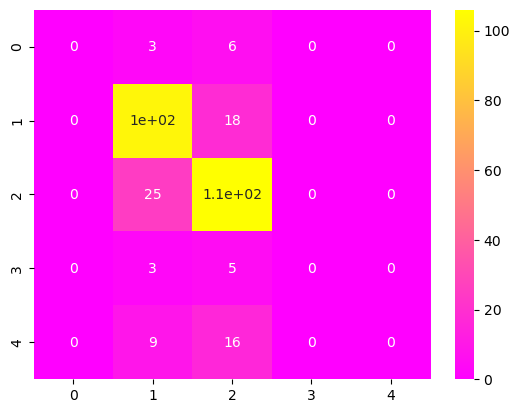

In [171]:
confusion4=confusion_matrix(y_test,prediction4)
print(confusion4)
sns.heatmap(confusion4,annot=True,cmap='spring')